<h2>Results and cost calculations from realistic trials</h2>

In [2]:
# Some imports to stop some annoying yellow underlines
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import importlib

# Very important line to run the setup notebook!!!
%run do_plot_setup.ipynb
import cl2_utilities as cl2_utils

# Extract some shared values that are used to facilitate plotting. Call 'display' on any of them to see their contents.
plot_default_properties = get_and_apply_plot_defaults() #Ignore yellow underline
line_default_properties = get_default_line_properties() #Ignore yellow underline
cl2_experiment_constants = get_cl2_experiment_constants() #Ignore yellow underline
(all_conversion_data,all_bypass_data) = get_experimental_data() #Ignore underline. These two dataframes have all the experimental results.

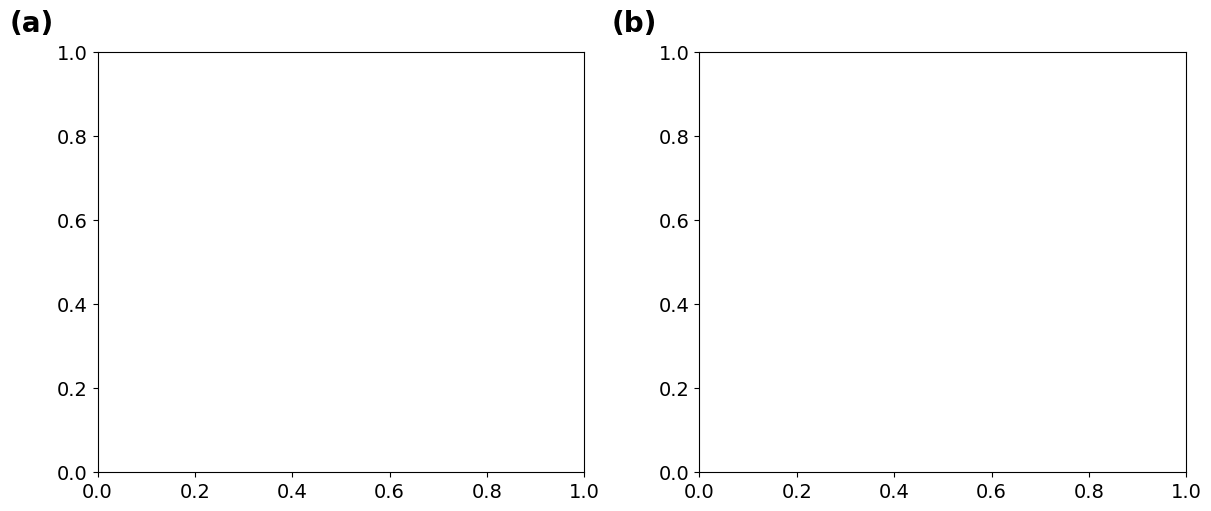

In [5]:
(fig,((ax_a,ax_b)))=plt.subplots(1,2,figsize=(plot_default_properties['figure_width'],5))

# a
ax_a.text(-0.18,1.05, "(a)", transform=ax_a.transAxes, size=plot_default_properties['subplot_letter_size'], weight='bold')

# b
ax_b.text(-0.18,1.05, "(b)", transform=ax_b.transAxes, size=plot_default_properties['subplot_letter_size'], weight='bold')

# Make the cost contour plot. Note we assume a fixed (90%) reflector efficiency.
@np.vectorize
def get_cost_per_ton_ch4(cl_usage, inlet_cl2, ch4_conversion):
    tons_cl2_per_ton_ch4 = (70.9060/16.04)*(inlet_cl2/ch4_conversion)
    cl2_cost_per_ton_ch4 = tons_cl2_per_ton_ch4*cl2_experiment_constants.cost_per_ton_cl2
    moles_photons_per_ton_ch4 = 62500*cl_usage*(1.0/cl2_experiment_constants.reflector_efficiency)*0.5 #Each UV photon produces 2 Cl*'s when it hits a Cl2
    light_cost_per_ton_ch4 = moles_photons_per_ton_ch4*cl2_experiment_constants.LED_cost_per_mole_photons
    return cl2_cost_per_ton_ch4+light_cost_per_ton_ch4




plt.savefig('exported_images/realistic_trials_and_cost_modeling.png', bbox_inches='tight',dpi=300)
plt.show()